# Archetype Analysis

In [33]:
from sklearn.datasets import load_iris

wine = load_iris()

X = wine.data

In [35]:
from archetypes import AA

method_kwargs = {
    "max_iter_optimizer": 10,
}

n_archetypes = 3

model = AA(n_archetypes=n_archetypes, method="pgd", method_kwargs=method_kwargs, random_state=3)
model.fit(X)

model.archetypes_

array([[4.96100535, 2.19498114, 3.88995949, 1.27297167],
       [7.56353487, 3.22920425, 6.62227573, 2.32489338],
       [4.90168566, 3.51768976, 1.10514598, 0.16342736]])

In [36]:
from archetypes.datasets import sort_by_archetype_similarity, permute_dataset

X_sorted, info = sort_by_archetype_similarity(X, [model.similarity_degree_], model.archetypes_)

similarity_degree_permuted, _ = permute_dataset(model.similarity_degree_, info["perms"])

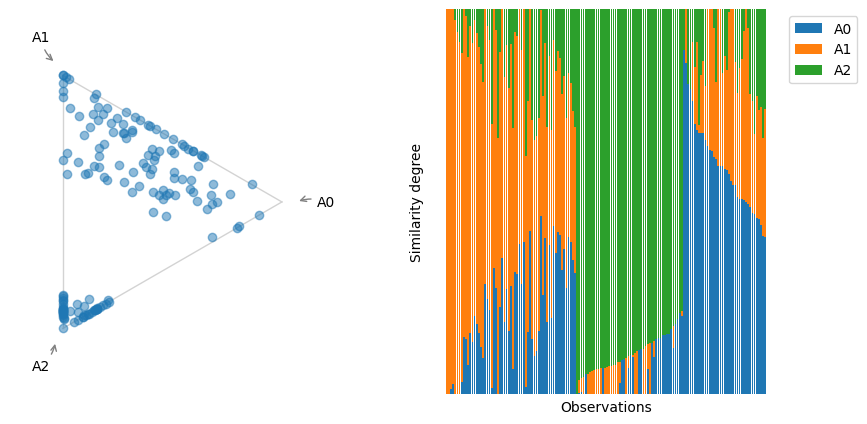

In [37]:
import matplotlib.pyplot as plt
from archetypes.visualization import stacked_bar, simplex

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
simplex(similarity_degree_permuted, alpha=0.5, ax=ax[0])
stacked_bar(similarity_degree_permuted, ax=ax[1])

plt.show()